# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
edu = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [4]:
year = edu['AVG_MATH_4_SCORE'].nunique()
print(year)

50


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [5]:
M= edu[edu['STATE'] == 'MICHIGAN']
avgM = M['AVG_MATH_4_SCORE'].mean()
O= edu[edu['STATE'] == 'OHIO']
avgO = O['AVG_MATH_4_SCORE'].mean()
print(avgM, " ", avgO)

234.36363636363637   239.45454545454547


Find the average for your chosen test across all states in 2019

In [6]:
score2019=edu[edu['YEAR']== 2019]
avg2019=score2019['AVG_MATH_4_SCORE'].mean()
print(avg2019)

239.9433962264151


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [7]:
max_state = edu.groupby('STATE')['AVG_MATH_4_SCORE'].max()
print(max_state)

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
edu['expenditure_over_Revenue'] = edu['TOTAL_EXPENDITURE']/edu['TOTAL_REVENUE']
print(edu['expenditure_over_Revenue'])

0       0.990635
1       0.926540
2       1.044045
3       1.018145
4       1.033466
          ...   
1710         NaN
1711         NaN
1712         NaN
1713         NaN
1714         NaN
Name: expenditure_over_Revenue, Length: 1715, dtype: float64


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

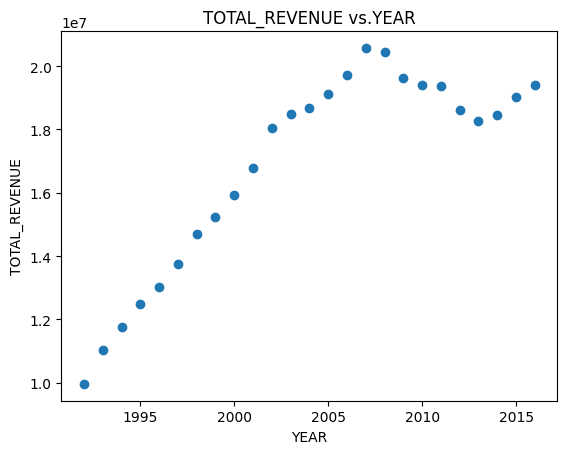

In [9]:
Mdata=edu[edu['STATE']=="MICHIGAN"]
plt.scatter(Mdata['YEAR'], Mdata['TOTAL_REVENUE'])

plt.xlabel('YEAR')
plt.ylabel('TOTAL_REVENUE')
plt.title('TOTAL_REVENUE vs.YEAR')

plt.show()


**<CAPTION FOR VIZ 1>**

**Visualization 2**

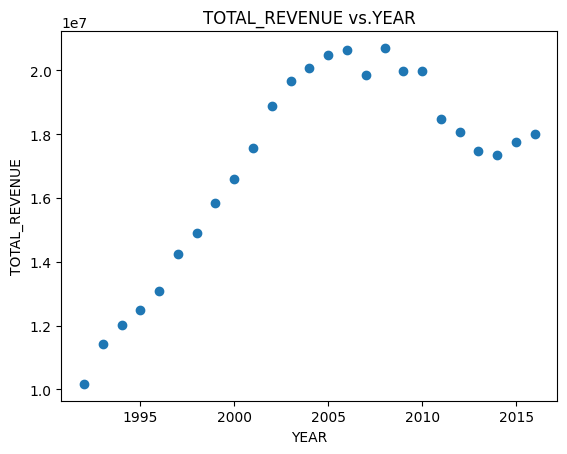

In [10]:
Mdata=edu[edu['STATE']=="MICHIGAN"]
plt.scatter(Mdata['YEAR'], Mdata['TOTAL_EXPENDITURE'])

plt.xlabel('YEAR')
plt.ylabel('TOTAL_REVENUE')
plt.title('TOTAL_REVENUE vs.YEAR')

plt.show()

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

edu = pd.read_csv('../data/states_edu.csv')
Mdata=edu[edu['STATE']=="MICHIGAN"][:30]
X = Mdata['YEAR']
y = Mdata['TOTAL_EXPENDITURE']
print(X.size)

30


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24,)
(24,)
(6,)
(6,)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [43]:
# import your sklearn class here
# !pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [64]:
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()


# Combine X_train and y_train to ensure alignment
train_data = pd.concat([X_train, y_train], axis=1)

# Drop rows where y_train is NaN
train_data = train_data.dropna(subset=[y_train.name])

# Separate X_train and y_train again
X_train = train_data.drop(columns=[y_train.name])
y_train = train_data[y_train.name]
# print(X_train.isnull().values.any())
# print(y_train.isnull().values.any())
print(X_train.shape)
print(X_test.shape)


# time_steps = 1
# n_features = 1

# X_train_reshaped = X_train_array.reshape((-1, time_steps, n_features))
# X_test_reshaped = X_test_array.reshape((-1, time_steps, n_features))
# print(X_train_reshaped.shape)
# print(X_test_reshaped.shape)

# model = Sequential()
# model.add(LSTM(units=50, return_sequences=False, input_shape=(time_steps, 1)))
# model.add(Dense(1))

# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(X_train_reshaped, y_train, epochs=20, batch_size=4)

time_steps = 5
n_features = 1  # Assuming each feature is a single value

def create_sequences(data, time_steps):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data[i:(i + time_steps)])
        ys.append(data[i + time_steps])
    return np.array(Xs), np.array(ys)

# Reshape the data into sequences
X_train_seq, y_train_seq = create_sequences(X_train_array, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_array, time_steps)
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(time_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_seq, y_train_seq, epochs=40, batch_size=4)


(20, 1)
(6,)
Epoch 1/40
4/4 [==============================] - 2s 6ms/step - loss: 4011165.5000
Epoch 2/40
4/4 [==============================] - 0s 7ms/step - loss: 4010527.0000
Epoch 3/40
4/4 [==============================] - 0s 8ms/step - loss: 4010080.5000
Epoch 4/40
4/4 [==============================] - 0s 7ms/step - loss: 4009737.2500
Epoch 5/40
4/4 [==============================] - 0s 7ms/step - loss: 4009151.2500
Epoch 6/40
4/4 [==============================] - 0s 9ms/step - loss: 4008799.5000
Epoch 7/40
4/4 [==============================] - 0s 7ms/step - loss: 4007969.0000
Epoch 8/40
4/4 [==============================] - 0s 7ms/step - loss: 4007351.0000
Epoch 9/40
4/4 [==============================] - 0s 6ms/step - loss: 4007056.5000
Epoch 10/40
4/4 [==============================] - 0s 6ms/step - loss: 4006763.0000
Epoch 11/40
4/4 [==============================] - 0s 6ms/step - loss: 4006468.7500
Epoch 12/40
4/4 [==============================] - 0s 7ms/step - loss: 4

In [65]:

# Fit the model to the training data




In [67]:

# Make predictions
y_pred = model.predict(X_test_seq)

print(y_pred)


1/1 [==============================] - 0s 24ms/step
[[4.139123]]


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [68]:
model.evaluate(X_test_seq, y_test_seq)

1/1 [==============================] - 0s 28ms/step - loss: 3987453.2500


3987453.25

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
col_name = 'COLUMN NAME OF ONE PREDICTOR'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

In [ ]:
col_name = 'COLUMN NAME OF ONE PREDICTOR"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**